In [11]:
import python_codon_tables as pct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# PRINT THE LIST OF NAMES OF ALL AVAILABLE TABLES

from codon_hamiltonian import *

In [12]:
print ('Available tables:', pct.available_codon_tables_names)
table = pct.get_codons_table('e_coli_316407')

Available tables: ['b_subtilis_1423', 'd_melanogaster_7227', 'm_musculus_domesticus_10092', 'm_musculus_10090', 'e_coli_316407', 'g_gallus_9031', 'c_elegans_6239', 's_cerevisiae_4932', 'h_sapiens_9606']


In [ ]:
HPDF_amino = 'EGPALRRSYWRHLRRLVLGPPEPPFSHVCQVGDPVLRGVAAPVERAQLGGPELQRLTQRLVQVMRRRRCVGLSAPQLGVPRQVLALELPEALCRECPPRQRALRQMEPFPLRVFVNPSLRVLDSRLVTFPEGCESVAGFLACVPRFQAVQISGLDPNGEQVVWQASGWAARIIQHEMDHLQGCLFIDKMDSRTFTNVYWMKVND'
input_amino = HPDF_amino

# Codon Usage Tables

In [ ]:
#Table
col1 = input_amino
col2 = []
for x in input_amino:
    value_list = list(table[x].values())
    key_list = list(table[x].keys())
    col2.append(key_list[value_list.index(max(value_list))].replace('T','U'))


two_dim_list = [[col1[x], col2[x]] for x in range(len(input_amino))]


my_data = pd.DataFrame(two_dim_list, columns = ['Amino acid sequence', 'Codon with high freq'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(my_data)

In [6]:
table_codon_RNA = "".join(col2)
table_codon_RNA = [x for x in table_codon_RNA]

In [5]:
print ('Available tables:', pct.available_codon_tables_names)
table = pct.get_codons_table('h_sapiens_9606')

Available tables: ['b_subtilis_1423', 'd_melanogaster_7227', 'm_musculus_domesticus_10092', 'm_musculus_10090', 'e_coli_316407', 'g_gallus_9031', 'c_elegans_6239', 's_cerevisiae_4932', 'h_sapiens_9606']


In [7]:
[table['E'], table['G'], table['P'], table['A'], table['L'], table['R'], table['C']]

[{'GAA': 0.42, 'GAG': 0.58},
 {'GGA': 0.25, 'GGC': 0.34, 'GGG': 0.25, 'GGT': 0.16},
 {'CCA': 0.28, 'CCC': 0.32, 'CCG': 0.11, 'CCT': 0.29},
 {'GCA': 0.23, 'GCC': 0.4, 'GCG': 0.11, 'GCT': 0.27},
 {'CTA': 0.07, 'CTC': 0.2, 'CTG': 0.4, 'CTT': 0.13, 'TTA': 0.08, 'TTG': 0.13},
 {'AGA': 0.21, 'AGG': 0.21, 'CGA': 0.11, 'CGC': 0.18, 'CGG': 0.2, 'CGT': 0.08},
 {'TGC': 0.54, 'TGT': 0.46}]

In [14]:
table = pct.get_codons_table('h_sapiens_9606')

In [15]:
table['A']

{'GCA': 0.23, 'GCC': 0.4, 'GCG': 0.11, 'GCT': 0.27}

Codon from D-wave

In [20]:
df_opt_codon = pd.read_csv('./result_data/HPDF_bs'+str(4)+'_c_f_1.csv', index_col=0)
dwave_codon_RNA = "".join(df_opt_codon['codon'])

Check coincidence between two seqs

In [18]:
np.argwhere(~(np.array(table_codon_RNA) == np.array([x for x in dwave_codon_RNA])))

array([], shape=(0, 1), dtype=int64)

CAI \& GC

In [19]:
#CAI
CAI_hu = CAIs("human")
CAI_ec = CAIs("ecoli")

CAI_hu(dwave_codon_RNA)
CAI_ec(dwave_codon_RNA)

print("-"*30)
print("dwave_codon (block-size:5)")
print(f"CAI of dwave_codon for human : {CAI_hu(dwave_codon_RNA)}")
print(f"CAI of dwave_codon for ecoli : {CAI_ec(dwave_codon_RNA)}")

#GC
from Bio.SeqUtils import GC
GC_dwave = GC(dwave_codon_RNA)
print(f"GC of dwave_codon : {GC_dwave}")

------------------------------
dwave_codon (block-size:5)
CAI of dwave_codon for human : 0.7669328657067714
CAI of dwave_codon for ecoli : 1.0
GC of dwave_codon : 67.81045751633987


# Count GC

In [37]:
input_list = []
codon_freq_list = []
GC_list = []

for aa, val in table.items():
    #print('Amino Acid:', aa)
    for cd, cuf in val.items():
        input = aa + ': ' + cd
        input_list.append(input)
        
        # codon usage frequency
        codon_freq_list.append(cuf)

        # Counting G and C
        counts_G = cd.count('G')
        counts_C = cd.count('C')
        GC_list.append(counts_G+counts_C)

In [39]:
len(codon_freq_list)

64

In [40]:
len(GC_list)

64

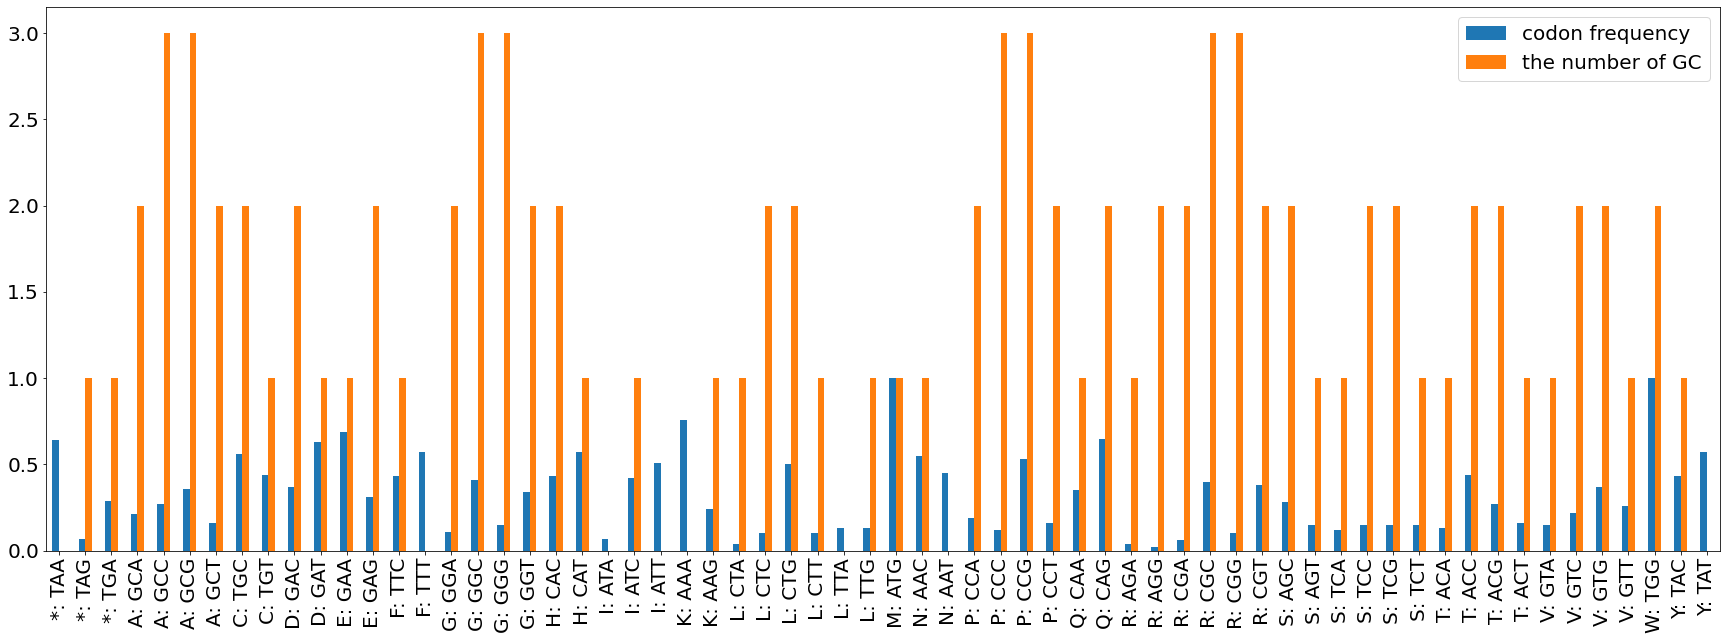

In [57]:
rslt_df = pd.DataFrame(list(zip(codon_freq_list, GC_list)),
                        columns=['codon frequency', "the number of GC"],
                        index = input_list)
rslt_df.plot.bar(figsize=(30,10), fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [46]:
sum(GC_list)/63

1.5238095238095237